In [10]:
import mne
# import numpy as np
import pandas as pd

from functions import mne_prepping as mneprep
from functions import mne_helpers as mnehelp
from functions import read_eeg as readeegr
# from functions import mne_stats as mnestats
from functions import paths

# from mne.time_frequency import tfr_multitaper, tfr_stockwell, tfr_morlet
base_path = 'E:/OneDrive/FGU/iEEG/Data'
participant = 'p129'
scalings = {'seeg': 1e2, 'ecg': 1e2, 'misc': 1e2}
file_paths = paths.prep_unity_alloego_files(base_path, participant)
frequency = readeegr.get_frequency(paths.eeg_path(paths.unity_alloego_path(base_path, participant)))

Using matplotlib backend: TkAgg


In [3]:
# loading montage
pd_montage = readeegr.read_montage(file_paths['montage']['original']) 
pd_montage_referenced = readeegr.read_montage(file_paths['montage']['referenced']) 

In [4]:
# Loading Unity data
raw_original = mneprep.load_raw(file_paths['EEG']['base'], frequency, pd_montage)
#raw_perhead = mneprep.load_raw(file_paths['EEG']['perHeadbox'], frequency, pd_montage_referenced)
#raw_perelectrode = mneprep.load_raw(file_paths['EEG']['perElectrode'], frequency, pd_montage_referenced)
#raw_bipolar = mneprep.load_raw(file_paths['EEG']['bipolar'], frequency, pd_montage_referenced)

Creating RawArray with float64 data, n_channels=102, n_times=716801
    Range : 0 ... 716800 =      0.000 ...  2800.000 secs
Ready.


In [5]:
pd_events = mneprep.load_preprocessed_events(file_paths)
mne_events, events_mapp = mneprep.pd_to_mne_events(pd_events, frequency)

572 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 572 events and 1537 original time points ...
0 bad epochs dropped
Loading data for 79 events and 1537 original time points ...
Traceback (most recent call last):
  File "f:\Projects\iEEG\iEEG-python\venv64\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "f:\Projects\iEEG\iEEG-python\venv64\lib\site-packages\mne\viz\utils.py", line 796, in _resize_event
    _update_borders(params, new_width, new_height)
  File "f:\Projects\iEEG\iEEG-python\venv64\lib\site-packages\mne\viz\utils.py", line 602, in _update_borders
    params['zen_w_delta'] *= old_width / new_width
KeyError: 'zen_w_delta'
Loading data for 20 events and 1537 original time points ...


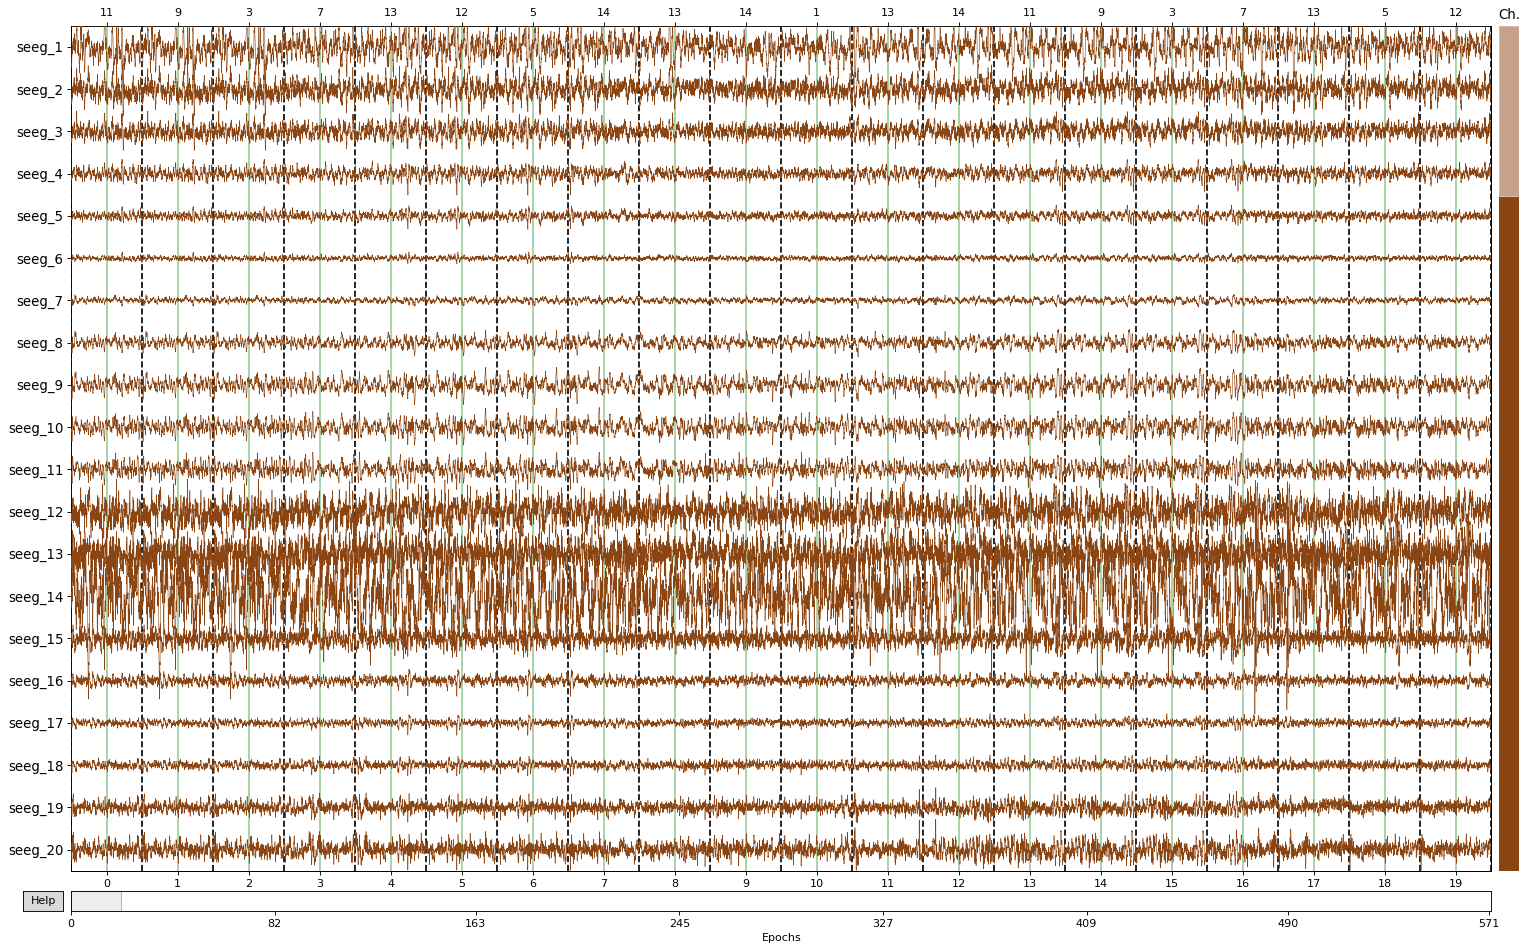

In [11]:
# Epoching
epochs_original = mne.Epochs(raw_original, mne_events, event_id=events_mapp,
                             tmin=-3, tmax=3)
epochs_original.plot(scalings=scalings)